<a href="https://colab.research.google.com/github/Okies/ML-with-Colab/blob/master/Keras/MLP_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 다운로드

아래 링크 데이터 다운로드 이후, 구글 드라이브 **Colab Notbooks/data**에 위치

[pima-indians-diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

#구글 드라이브 마운트

아래 링크 클릭 후  권한 요청 허용 및 코드 복사해서 입력

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# 경로 확인 및 이동 테스트

In [0]:
%ls

%cd ./drive

%ls

%cd ./My Drive

%ls

%cd ./Colab Notebooks

%ls

%cd ./data

%ls

In [0]:
%cd ../../../..

# 데이터 확인

In [0]:
import pandas as pd
dataset = pd.read_csv("./drive/My Drive/Colab Notebooks/data/diabetes.csv", delimiter=",")
dataset = dataset.values

dataset

In [0]:
df = pd.DataFrame(dataset)

df

# 학습

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(5)

import pandas as pd
dataset = pd.read_csv("./drive/My Drive/Colab Notebooks/data/diabetes.csv", delimiter=",")
dataset = dataset.values

x_train = dataset[:700,0:8]
y_train = dataset[:700,8]
x_test = dataset[700:,0:8]
y_test = dataset[700:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1600, batch_size=64)

# 모델 시각화

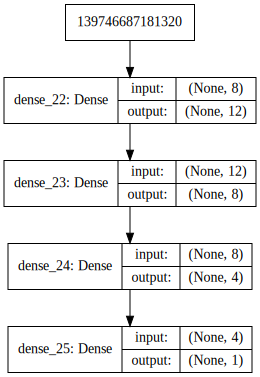

In [55]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# 평가

In [0]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))